<a href="https://colab.research.google.com/github/veetcoder/pytorch-notebook/blob/main/Simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [36]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [37]:
# Pick a seed for randomization
torch.manual_seed(41)

In [38]:
# Create an instance of model
model = Model()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [41]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [42]:
# Change last column to number
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [43]:
# Train Test Split! Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [44]:
# Convert df to numpy arrays
X = X.values
y = y.values

In [45]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [48]:
# Convert X Features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [50]:
# Set the criterion of model to measure the error, how far off the prediction are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [51]:
# Train our model
# Epochs (one run thru all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, is going to be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: for fine tuning the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1236077547073364
Epoch: 10 and loss: 1.0140193700790405
Epoch: 20 and loss: 0.8201445937156677
Epoch: 30 and loss: 0.5947582721710205
Epoch: 40 and loss: 0.40700215101242065
Epoch: 50 and loss: 0.2779764235019684
Epoch: 60 and loss: 0.18812686204910278
Epoch: 70 and loss: 0.13006657361984253
Epoch: 80 and loss: 0.09356435388326645
Epoch: 90 and loss: 0.07188281416893005


Text(0.5, 0, 'Epoch')

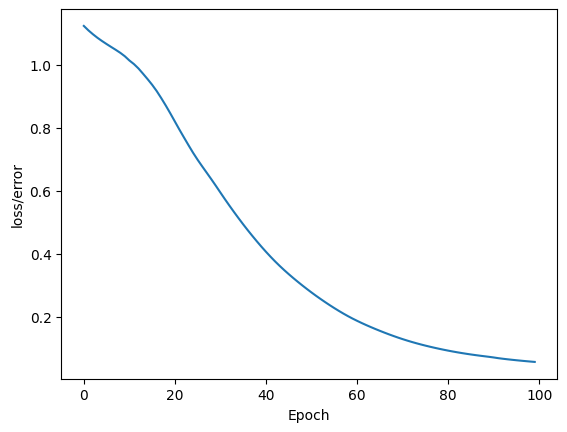

In [52]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [55]:
# Evaluate Model on test data set (validate the model)
with torch.no_grad(): # turn off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
loss

tensor(0.0860)

In [59]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our networh think it is
    print(f'{i + 1} - {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

correct

1 - tensor([ 6.1747, -2.9049, -5.9248]) 	 0 	 0
2 - tensor([ 6.2672, -2.9665, -6.0198]) 	 0 	 0
3 - tensor([ 5.7213, -2.6181, -5.4328]) 	 0 	 0
4 - tensor([-6.5494,  3.4980,  7.8137]) 	 2 	 2
5 - tensor([-2.5307,  4.6522, -0.4742]) 	 1 	 1
6 - tensor([-2.4810,  4.5628, -0.4056]) 	 1 	 1
7 - tensor([-5.7405,  4.2250,  5.5122]) 	 2 	 2
8 - tensor([-7.1653,  4.1224,  8.0042]) 	 2 	 2
9 - tensor([-3.0068,  5.1448, -0.2919]) 	 1 	 1
10 - tensor([-7.7044,  4.0478,  9.0226]) 	 2 	 2
11 - tensor([ 5.8403, -2.7421, -5.4537]) 	 0 	 0
12 - tensor([-6.7691,  3.7223,  7.8946]) 	 2 	 2
13 - tensor([-1.6506,  3.7806, -0.8547]) 	 1 	 1
14 - tensor([-2.9850,  4.8133,  0.1745]) 	 1 	 1
15 - tensor([ 5.5447, -2.4931, -5.2694]) 	 0 	 0
16 - tensor([-3.0594,  5.1217, -0.1214]) 	 1 	 1
17 - tensor([ 7.4468, -3.9976, -6.6728]) 	 0 	 0
18 - tensor([ 5.9414, -2.7676, -5.6463]) 	 0 	 0
19 - tensor([ 5.4933, -2.4026, -5.3463]) 	 0 	 0
20 - tensor([-5.1564,  4.3425,  4.3935]) 	 1 	 2
21 - tensor([-5.1534,  4.3400

28

In [60]:
# Evaluate model
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([ 6.2470, -3.0491, -5.7859])


In [61]:
# Save our NN model
torch.save(model.state_dict(), "iris_model.pt")

In [63]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load("iris_model.pt"))

<All keys matched successfully>

In [64]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)